# Covid19-cases Analysis

In [13]:
import pandas as pd
import numpy as np
from doctest import testmod

In [3]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed=pd.read_csv(CONFIRMED)
deaths=pd.read_csv(DEATHS)
recovered=pd.read_csv(RECOVERED)

confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,147,148,148,148,148,151,151,152,152,153
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169,1541285
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,146317,147312,148325,148682,149120,150218,151392,152253,153173,153825
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,118
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,4639,4642,4645,4650,4657,4666,4682,4712,4748,4771


# SOLUTION 1

In [33]:


import pandas as pd
import numpy as np
from doctest import testmod

CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed=pd.read_csv(CONFIRMED)
deaths=pd.read_csv(DEATHS)
recovered=pd.read_csv(RECOVERED)


def covid19(country):
    """
    >>> us=covid19('US')
    >>> us.loc['2020-12-07']
    Confirmed    15020042
    Deaths         283763
    Recovered     5714557
    Name: 2020-12-07 00:00:00, dtype: object
    
    >>> poland=covid19('Poland')
    >>> poland.loc['2020-12-07']
    Confirmed    1067870
    Deaths         20181
    Recovered     722446
    Name: 2020-12-07 00:00:00, dtype: object
    """

    us_c=confirmed['Country/Region']==country
    us_c=confirmed[us_c].transpose()[4:].sum(axis=1)    #some countires have their provinces in different parts of the world
    us_c.columns=["Confirmed"]                          #yet they rightfully belong to them, such example is France
    us_c.index=pd.to_datetime(us_c.index)               #therefore all countries provinces has been summed up 
    
    us_d=deaths['Country/Region']==country
    us_d=deaths[us_d].transpose()[4:].sum(axis=1)
    us_d.columns=["Deaths"]
    us_d.index=pd.to_datetime(us_d.index)
    
    us_r=recovered['Country/Region']==country
    us_r=recovered[us_r].transpose()[4:].sum(axis=1)
    us_r.columns=["Recovered"]
    us_r.index=pd.to_datetime(us_r.index)
    
    final=pd.concat((us_c,us_d,us_r),axis=1)
    final.columns=["Confirmed","Deaths","Recovered"]
    
    return final


us=covid19('US')
poland=covid19('Poland')
india=covid19('India')
france=covid19("France")
# testmod()


In [26]:
french_provinces=confirmed[confirmed["Country/Region"]=="France"]
french_provinces[["Province/State","Country/Region"]]

,Province/State,Country/Region
118,French Guiana,France
119,French Polynesia,France
120,Guadeloupe,France
121,Martinique,France
122,Mayotte,France
123,New Caledonia,France
124,Reunion,France
125,Saint Barthelemy,France
126,Saint Pierre and Miquelon,France
127,St Martin,France


In [32]:
france

,Confirmed,Deaths,Recovered
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
...,...,...,...
2020-12-16,2465126.0,59472.0,186004.0
2020-12-17,2483524.0,59733.0,187199.0
2020-12-18,2499529.0,60345.0,188488.0
2020-12-19,2516957.0,60534.0,189403.0


# SOLUTION 2

In [14]:

def _get(country, df, columnname):
    """
    >>> _get('US', confirmed, 'Confirmed').loc['2020-12-07']
    Confirmed    14949299
    Name: 2020-12-07 00:00:00, dtype: int32

    >>> _get('US', deaths, 'Deaths').loc['2020-12-07']
    Deaths    283703
    Name: 2020-12-07 00:00:00, dtype: int32
    """
    query = df['Country/Region'] == country
    df = df[query].transpose()[4:].sum(axis=1)

    return pd.DataFrame(data=df,
                        columns=[columnname],
                        index=pd.to_datetime(df.index),
                        dtype=np.int32)
 

def covid19(country):
    """
    >>> covid19('US').loc['2020-12-07']
    Confirmed    14949299
    Deaths         283703
    Recovered     5714557
    Name: 2020-12-07 00:00:00, dtype: int32

    >>> covid19('Poland').loc['2020-12-07']
    Confirmed    1067870
    Deaths         20181
    Recovered     722446
    Name: 2020-12-07 00:00:00, dtype: int32
    """
    return pd.concat((
        _get(country, confirmed, 'Confirmed'),
        _get(country, deaths, 'Deaths'),
        _get(country, recovered, 'Recovered'),
    ), axis=1)

france = covid19('France')
france

,Confirmed,Deaths,Recovered
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,2,0,0
2020-01-25,3,0,0
2020-01-26,3,0,0
...,...,...,...
2020-12-16,2465126,59472,186004
2020-12-17,2483524,59733,187199
2020-12-18,2499529,60345,188488
2020-12-19,2516957,60534,189403


# PLOTS

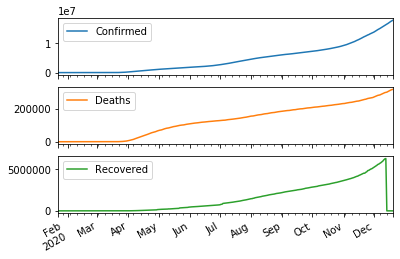

In [34]:
_=us.plot(kind='line',subplots=True,)

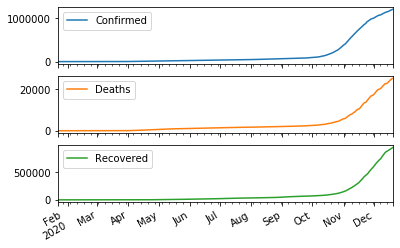

In [35]:
_=poland.plot(kind='line',subplots=True,)

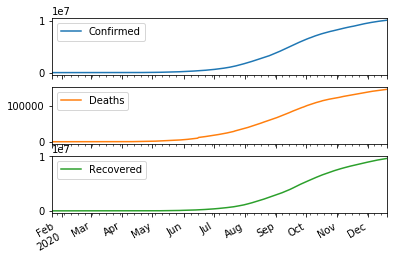

In [36]:
_=india.plot(kind='line',subplots=True,)

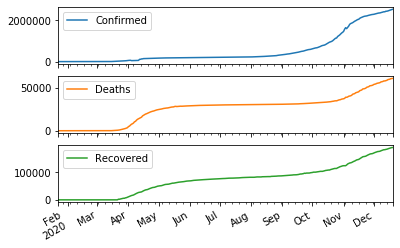

In [37]:
_=france.plot(kind='line',subplots=True,)